In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/Metro_Interstate_Traffic_Volume.csv',parse_dates=['date_time'],index_col='date_time')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
df.shape

(48204, 8)

In [5]:
df['holiday'].value_counts()

None                         48143
Labor Day                        7
New Years Day                    6
Thanksgiving Day                 6
Christmas Day                    6
Martin Luther King Jr Day        6
Washingtons Birthday             5
Independence Day                 5
State Fair                       5
Veterans Day                     5
Columbus Day                     5
Memorial Day                     5
Name: holiday, dtype: int64

In [6]:
df['weather_main'].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [7]:
df['weather_description'].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


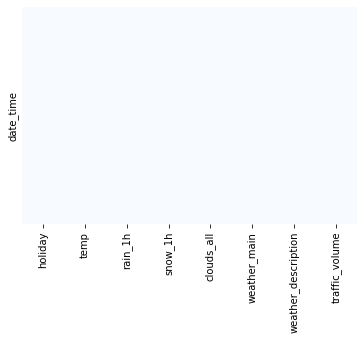

In [9]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='Blues')

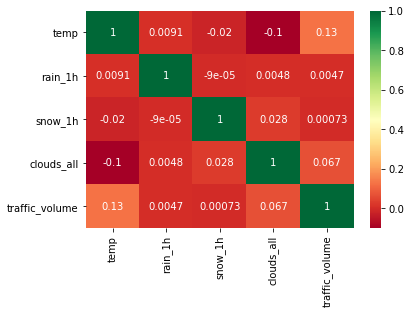

In [10]:
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [11]:
df['holiday']=df['holiday'].astype('category')
df['weather_main']=df['weather_main'].astype('category')
df['weather_description']=df['weather_description'].astype('category')

In [12]:
df['holiday']=df['holiday'].cat.codes
df['weather_main']=df['weather_main'].cat.codes
df['weather_description']=df['weather_description'].cat.codes

In [13]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,7,288.28,0.0,0.0,40,1,24,5545
2012-10-02 10:00:00,7,289.36,0.0,0.0,75,1,2,4516
2012-10-02 11:00:00,7,289.58,0.0,0.0,90,1,19,4767
2012-10-02 12:00:00,7,290.13,0.0,0.0,90,1,19,5026
2012-10-02 13:00:00,7,291.14,0.0,0.0,75,1,2,4918


In [14]:
a=df['traffic_volume'].resample('Y').mean()
a

date_time
2012-12-31    3207.802657
2013-12-31    3286.762160
2014-12-31    3250.938004
2015-12-31    3242.900983
2016-12-31    3169.441328
2017-12-31    3340.703065
2018-12-31    3260.112341
Freq: A-DEC, Name: traffic_volume, dtype: float64

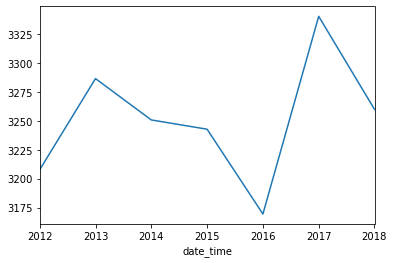

In [15]:
df['traffic_volume'].resample('Y').mean().plot()

In [16]:
a.values

array([3207.80265729, 3286.76216027, 3250.93800372, 3242.90098331,
       3169.44132818, 3340.70306459, 3260.11234117])

Text(0.5, 0, 'date_time')

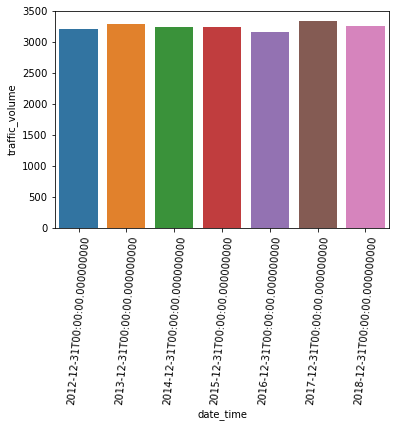

In [30]:
plt.xticks(rotation=85)
sns.barplot(x=a.index,y=a.values)
plt.ylabel('traffic_volume')
plt.xlabel('date_time')

In [21]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [33]:
df['2012-10']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,7,288.28,0.0,0.0,40,1,24,5545
2012-10-02 10:00:00,7,289.36,0.0,0.0,75,1,2,4516
2012-10-02 11:00:00,7,289.58,0.0,0.0,90,1,19,4767
2012-10-02 12:00:00,7,290.13,0.0,0.0,90,1,19,5026
2012-10-02 13:00:00,7,291.14,0.0,0.0,75,1,2,4918
...,...,...,...,...,...,...,...,...
2012-10-31 19:00:00,7,278.48,0.0,0.0,20,1,4,2711
2012-10-31 20:00:00,7,276.86,0.0,0.0,20,1,4,2690
2012-10-31 21:00:00,7,275.45,0.0,0.0,1,0,27,2539


In [36]:
dir(df.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_delegate_accessors',
 '_add_logical_methods',

In [37]:
df.index.month

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='date_time', length=48204)

In [38]:
df['months']=df.index.month

In [39]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,months
date_time,,,,,,,,,
2012-10-02 09:00:00,7,288.28,0.0,0.0,40,1,24,5545,10
2012-10-02 10:00:00,7,289.36,0.0,0.0,75,1,2,4516,10
2012-10-02 11:00:00,7,289.58,0.0,0.0,90,1,19,4767,10
2012-10-02 12:00:00,7,290.13,0.0,0.0,90,1,19,5026,10
2012-10-02 13:00:00,7,291.14,0.0,0.0,75,1,2,4918,10


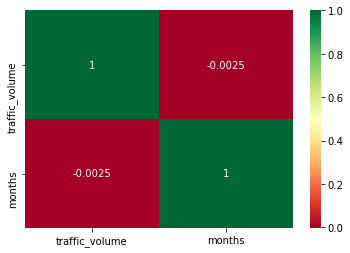

In [40]:
sns.heatmap(df[['traffic_volume','months']].corr(),cmap='RdYlGn',annot=True)

In [43]:
df['months'].value_counts().sort_index()

1     4006
2     3526
3     3793
4     4259
5     4436
6     3772
7     4795
8     4378
9     3831
10    3473
11    3686
12    4249
Name: months, dtype: int64

In [46]:
X=df.drop(['traffic_volume','months'],axis=1)
Y=df['traffic_volume']

In [44]:
from sklearn.model_selection import train_test_split

In [139]:
Z=df.drop(['months','traffic_volume','weather_description','holiday'],axis=1)

In [140]:
x_train,x_test,y_train,y_test =train_test_split(Z,Y,random_state=0,test_size=0.25)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [141]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [55]:
y_pred_LR=LR.predict(x_test)
y_pred_RF=RF.predict(x_test)
y_pred_XGB=XGB.predict(x_test)

In [144]:
LR.score(x_test,y_test)*100

-705.8884496141943

In [145]:
LR.score(x_train,y_train)*100

3.179161442041445

In [146]:
RF.score(x_test,y_test)*100

-8.8736509392775

In [147]:
RF.score(x_train,y_train)*100

66.26544434459217

In [148]:
XGB.score(x_test,y_test)*100

11.031567498845119

In [149]:
XGB.score(x_train,y_train)*100

21.29059338170447

In [62]:
X.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2012-10-02 09:00:00,7,288.28,0.0,0.0,40,1,24
2012-10-02 10:00:00,7,289.36,0.0,0.0,75,1,2
2012-10-02 11:00:00,7,289.58,0.0,0.0,90,1,19
2012-10-02 12:00:00,7,290.13,0.0,0.0,90,1,19
2012-10-02 13:00:00,7,291.14,0.0,0.0,75,1,2


In [64]:
from sklearn.decomposition import PCA

In [87]:
X_data=PCA(n_components=2).fit_transform(Z)

In [68]:
X.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description'],
      dtype='object')

In [88]:
X_PCA=pd.DataFrame(X_data)

In [89]:
X_PCA.head()

,0,1
0,-10.256700,-6.009440
1,26.334276,-10.315675
2,39.865352,-9.310132
3,39.844141,-9.857186
4,26.265629,-12.086140


In [90]:
x_train,x_test,y_train,y_test =train_test_split(X_PCA,Y,random_state=0,test_size=0.25)

In [91]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_test,y_test)*100)
print(LR.score(x_train,y_train)*100)

2.6791534257154304
2.3141905255863904


In [92]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_test,y_test)*100)
print(RF.score(x_train,y_train)*100)

-17.297690007904755
65.74376432143441


In [93]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
print(XGB.score(x_test,y_test)*100)
print(XGB.score(x_train,y_train)*100)

7.547696304643159
19.212826135564022
